In [50]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [6]:
# Display basic info
print("Shape:", df.shape)

Shape: (148670, 34)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [8]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [9]:
df.isnull().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [10]:
# Find columns with missing values
cols_with_missing = df.columns[df.isnull().any()]
print(cols_with_missing)

Index(['loan_limit', 'approv_in_adv', 'loan_purpose', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'property_value', 'income', 'age', 'submission_of_application', 'LTV',
       'dtir1'],
      dtype='object')


In [11]:
missing_count = df.isnull().sum()
print(missing_count) # Shows how many missing values per column

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

Columns to Drop (High Missing Values)

rate_of_interest (36,439 missing)

Interest_rate_spread (36,639 missing)

Upfront_charges (39,642 missing)

property_value (15,098 missing)

LTV (15,098 missing)

dtir1 (24,121 missing)

In [12]:
df.drop(['rate_of_interest','Interest_rate_spread','Upfront_charges'], axis=1, inplace=True)
df.drop(['property_value','LTV','dtir1'], axis=1, inplace=True)

loan_limit (3,344 missing)

approv_in_adv (908 missing)

loan_purpose (134 missing)

term (41 missing)

Neg_ammortization (121 missing)

age (200 missing)

submission_of_application (200 missing)

income (9,150 missing)

In [13]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type', 'Status'],
      dtype='object')

In [14]:
df.drop(['ID','year'], axis=1, inplace=True)

# Train test split and model selection

In [26]:
X = df.drop('Status', axis=1)
y = df['Status']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)

Make a PIPELINE after split

In [28]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [29]:
# Seperate numerical and categorical columns:

num_col = X_train.select_dtypes(include=['int64','float64']).columns
cat_col = X_train.select_dtypes(include=['object']).columns

In [30]:
# NUMERICAL AND CATEGORICAL TRANSFORMERS

num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

cat_pipeline= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [31]:
# COMBINE USING COLOUMN TRANSFORMERS

preprocessor = ColumnTransformer(transformers=[
    ('num',num_pipeline,num_col),
    ('cat',cat_pipeline,cat_col)
])

FIT AND TRANSFORMERS

In [34]:
# Fit only on training data
X_train_prepared = preprocessor.fit_transform(X_train)

In [35]:
# Transform test data (using learned parameters)
X_test_prepared = preprocessor.transform(X_test)

TRAINING A BASELINE MODEL

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [38]:
# Initialize Model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train_prepared,y_train)

LogisticRegression(max_iter=1000)

In [41]:
# Prediction using Model

y_pred=log_reg.predict(X_test_prepared)
y_proba = log_reg.predict_proba(X_test_prepared)[:, 1]

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8651711845025897
Precision: 0.9481276005547851
Recall: 0.47209944751381216
F1-score: 0.630336560627017
ROC-AUC: 0.8288783577400873

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92     22494
           1       0.95      0.47      0.63      7240

    accuracy                           0.87     29734
   macro avg       0.90      0.73      0.77     29734
weighted avg       0.88      0.87      0.85     29734



# Alternate Approach (Preprocessign +Model) using Pipeline

In [43]:
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',LogisticRegression(max_iter=1000))
])

# Fit Model for training
log_reg_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['loan_amount', 'term', 'income', 'Credit_Score'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ig...
                                                  Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

In [45]:
# Predict the Output

y_pred = log_reg_pipeline.predict(X_test)
y_proba = log_reg_pipeline.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8651711845025897
Precision: 0.9481276005547851
Recall: 0.47209944751381216
F1-score: 0.630336560627017
ROC-AUC: 0.8288783577400873

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92     22494
           1       0.95      0.47      0.63      7240

    accuracy                           0.87     29734
   macro avg       0.90      0.73      0.77     29734
weighted avg       0.88      0.87      0.85     29734



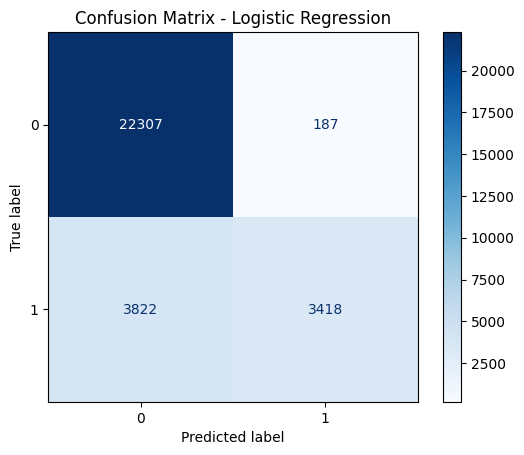

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


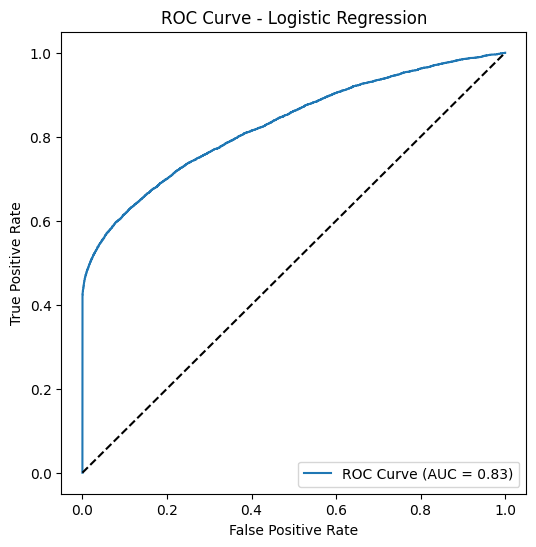

In [47]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()


In [48]:
import numpy as np

# Get feature names from preprocessor
ohe = log_reg_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
encoded_cat_cols = ohe.get_feature_names_out(cat_col)
all_feature_names = np.concatenate([num_col, encoded_cat_cols])

# Get coefficients from model
coefs = log_reg_pipeline.named_steps['model'].coef_[0]

# Combine into a DataFrame
import pandas as pd
feat_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': coefs
}).sort_values(by='Importance', ascending=False)

# Display top features
feat_importance.head(10)


,Feature,Importance
44,credit_type_EQUI,7.536348
29,lump_sum_payment_lpsm,1.580893
31,construction_type_mh,1.026451
61,Security_Type_Indriect,1.026451
37,Secured_by_land,1.026451
25,Neg_ammortization_neg_amm,0.842725
56,submission_of_application_to_inst,0.693916
21,open_credit_nopc,0.666373
5,loan_limit_ncf,0.605645
40,total_units_3U,0.513099


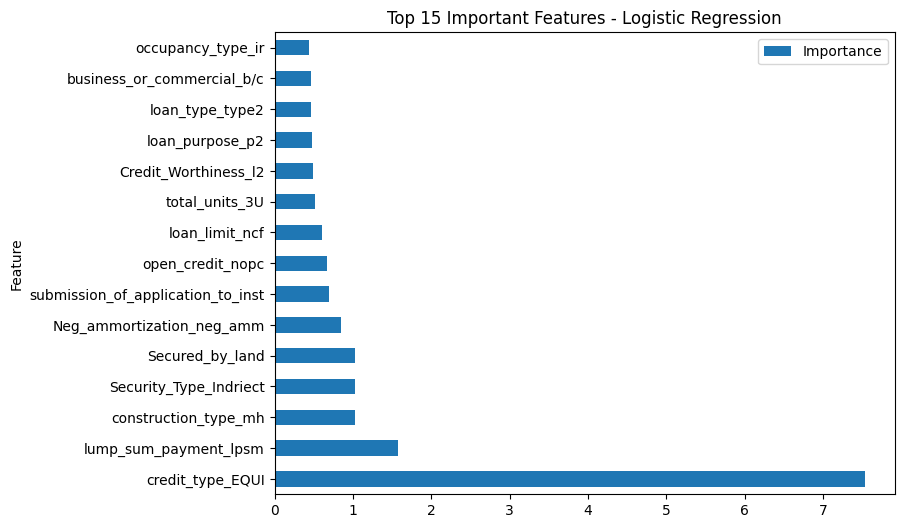

In [49]:
feat_importance.head(15).plot(kind='barh', x='Feature', y='Importance', figsize=(8,6))
plt.title("Top 15 Important Features - Logistic Regression")
plt.show()
